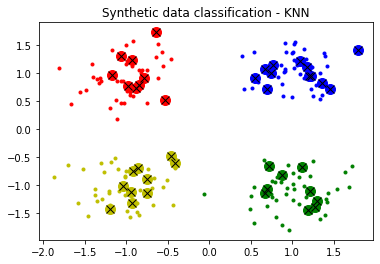

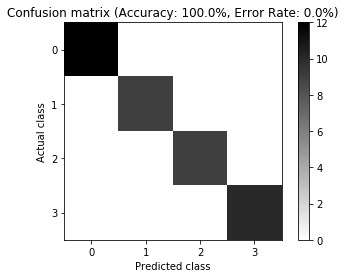

Ran Exercise 6.3.1


In [2]:
# exercise 6.3.1

from matplotlib.pyplot import (figure, plot, title, xlabel, ylabel, 
                               colorbar, imshow, xticks, yticks, show)
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric
from sklearn.metrics import confusion_matrix
from numpy import cov

# Load Matlab data file and extract variables of interest
mat_data = loadmat('./data/synth1.mat') # <-- change the number to change dataset
X = mat_data['X']
X_train = mat_data['X_train']
X_test = mat_data['X_test']
y = mat_data['y'].squeeze()
y_train = mat_data['y_train'].squeeze()
y_test = mat_data['y_test'].squeeze()
attributeNames = [name[0] for name in mat_data['attributeNames'].squeeze()]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)


# Plot the training data points (color-coded) and test data points.
figure(1)
styles = ['.b', '.r', '.g', '.y']
for c in range(C):
    class_mask = (y_train==c)
    plot(X_train[class_mask,0], X_train[class_mask,1], styles[c])


# K-nearest neighbors
K=5

# Distance metric (corresponds to 2nd norm, euclidean distance).
# You can set dist=1 to obtain manhattan distance (cityblock distance).
dist=2
metric = 'minkowski'
metric_params = {} # no parameters needed for minkowski

# You can set the metric argument to 'cosine' to determine the cosine distance
#metric = 'cosine' 
#metric_params = {} # no parameters needed for cosine

# To use a mahalonobis distance, we need to input the covariance matrix, too:
#metric='mahalanobis'
#metric_params={'V': cov(X_train, rowvar=False)}

# Fit classifier and classify the test points
knclassifier = KNeighborsClassifier(n_neighbors=K, p=dist, 
                                    metric=metric,
                                    metric_params=metric_params)
knclassifier.fit(X_train, y_train)
y_est = knclassifier.predict(X_test)


# Plot the classfication results
styles = ['ob', 'or', 'og', 'oy']
for c in range(C):
    class_mask = (y_est==c)
    plot(X_test[class_mask,0], X_test[class_mask,1], styles[c], markersize=10)
    plot(X_test[class_mask,0], X_test[class_mask,1], 'kx', markersize=8)
title('Synthetic data classification - KNN');

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_est);
accuracy = 100*cm.diagonal().sum()/cm.sum(); error_rate = 100-accuracy;
figure(2);
imshow(cm, cmap='binary', interpolation='None');
colorbar()
xticks(range(C)); yticks(range(C));
xlabel('Predicted class'); ylabel('Actual class');
title('Confusion matrix (Accuracy: {0}%, Error Rate: {1}%)'.format(accuracy, error_rate));

show()

print('Ran Exercise 6.3.1')

In [6]:
# exercise 1.5.1
import numpy as np
import pandas as pd

# Load the Iris csv data using the Pandas library
filename = './data/iris.csv'
df = pd.read_csv(filename)

# Pandas returns a dataframe, (df) which could be used for handling the data.
# We will however convert the dataframe to numpy arrays for this course as 
# is also described in the table in the exercise
raw_data = df.get_values() 

# Notice that raw_data both contains the information we want to store in an array
# X (the sepal and petal dimensions) and the information that we wish to store 
# in y (the class labels, that is the iris species).

# We start by making the data matrix X by indexing into data.
# We know that the attributes are stored in the four columns from inspecting 
# the file.
cols = range(0, 4) 
X = raw_data[:, cols]

# We can extract the attribute names that came from the header of the csv
attributeNames = np.asarray(df.columns[cols])

# Before we can store the class index, we need to convert the strings that
# specify the class of a given object to a numerical value. We start by 
# extracting the strings for each sample from the raw data loaded from the csv:
classLabels = raw_data[:,-1] # -1 takes the last column
# Then determine which classes are in the data by finding the set of 
# unique class labels 
classNames = np.unique(classLabels)
# We can assign each type of Iris class with a number by making a
# Python dictionary as so:
classDict = dict(zip(classNames,range(len(classNames))))
# The function zip simply "zips" togetter the classNames with an integer,
# like a zipper on a jacket. 
# For instance, you could zip a list ['A', 'B', 'C'] with ['D', 'E', 'F'] to
# get the pairs ('A','D'), ('B', 'E'), and ('C', 'F'). 
# A Python dictionary is a data object that stores pairs of a key with a value. 
# This means that when you call a dictionary with a given key, you 
# get the stored corresponding value. Try highlighting classDict and press F9.
# You'll see that the first (key, value)-pair is ('Iris-setosa', 0). 
# If you look up in the dictionary classDict with the value 'Iris-setosa', 
# you will get the value 0. Try it with classDict['Iris-setosa']

# With the dictionary, we can look up each data objects class label (the string)
# in the dictionary, and determine which numerical value that object is 
# assigned. This is the class index vector y:
y = np.array([classDict[cl] for cl in classLabels])
# In the above, we have used the concept of "list comprehension", which
# is a compact way of performing some operations on a list or array.
# You could read the line  "For each class label (cl) in the array of 
# class labels (classLabels), use the class label (cl) as the key and look up
# in the class dictionary (classDict). Store the result for each class label
# as an element in a list (because of the brackets []). Finally, convert the 
# list to a numpy array". 
# Try running this to get a feel for the operation: 
# list = [0,1,2]
# new_list = [element+10 for element in list]

# We can determine the number of data objects and number of attributes using 
# the shape of X
N, M = X.shape

# Finally, the last variable that we need to have the dataset in the 
# "standard representation" for the course, is the number of classes, C:
C = len(classNames)
print('Ran Exercise 1.5.1')


Ran Exercise 1.5.1


Crossvalidation fold: 1/150
Crossvalidation fold: 2/150
Crossvalidation fold: 3/150
Crossvalidation fold: 4/150
Crossvalidation fold: 5/150
Crossvalidation fold: 6/150
Crossvalidation fold: 7/150
Crossvalidation fold: 8/150
Crossvalidation fold: 9/150
Crossvalidation fold: 10/150
Crossvalidation fold: 11/150
Crossvalidation fold: 12/150
Crossvalidation fold: 13/150
Crossvalidation fold: 14/150
Crossvalidation fold: 15/150
Crossvalidation fold: 16/150
Crossvalidation fold: 17/150
Crossvalidation fold: 18/150
Crossvalidation fold: 19/150
Crossvalidation fold: 20/150
Crossvalidation fold: 21/150
Crossvalidation fold: 22/150
Crossvalidation fold: 23/150
Crossvalidation fold: 24/150
Crossvalidation fold: 25/150
Crossvalidation fold: 26/150
Crossvalidation fold: 27/150
Crossvalidation fold: 28/150
Crossvalidation fold: 29/150
Crossvalidation fold: 30/150
Crossvalidation fold: 31/150
Crossvalidation fold: 32/150
Crossvalidation fold: 33/150
Crossvalidation fold: 34/150
Crossvalidation fold: 3

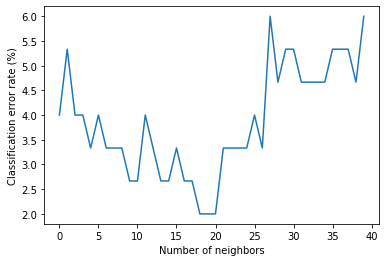

Ran Exercise 6.3.2


In [5]:
# exercise 6.3.2

from matplotlib.pyplot import figure, plot, xlabel, ylabel, show
import numpy as np
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

# requires data from exercise 1.5.1
#from ex1_5_1 import *

# Maximum number of neighbors
L=40

CV = model_selection.LeaveOneOut()
errors = np.zeros((N,L))
i=0
for train_index, test_index in CV.split(X, y):
    print('Crossvalidation fold: {0}/{1}'.format(i+1,N))    
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]

    # Fit classifier and classify the test points (consider 1 to 40 neighbors)
    for l in range(1,L+1):
        knclassifier = KNeighborsClassifier(n_neighbors=l);
        knclassifier.fit(X_train, y_train);
        y_est = knclassifier.predict(X_test);
        errors[i,l-1] = np.sum(y_est[0]!=y_test[0])

    i+=1
    
# Plot the classification error rate
figure()
plot(100*sum(errors,0)/N)
xlabel('Number of neighbors')
ylabel('Classification error rate (%)')
show()

print('Ran Exercise 6.3.2')

In [ ]:

K1 = 10 # for model selection
K2 = 10 # for optimal parameter selection

# K-fold crossvalidation
CV1 = model_selection.KFold(n_splits=K1, shuffle=True)

X = stats.zscore(X) # standardization

# Initialize variable
knn_test_error_k1 = np.zeros(K1)

k1=0
for par_index, test_index in CV1.split(X):
    print('Computing CV1 fold: {0}/{1}..'.format(k1+1,K1))
    print()
    
    # extract training and test set for current CV fold
    X_par, y_par = X[par_index,:], y[par_index]
    X_test, y_test = X[test_index,:], y[test_index]
    
    CV2 = model_selection.KFold(n_splits=K2, shuffle=False)
    
    #--------------------------------Regularized - LogRegression ----------------------------------------#
    k_interval = range(1,20)
    knn_gen_error_rate_s = np.zeros(len(k_interval))
    
    for s in range(0, len(k_interval)):
        k2 = 0
        knn_val_error_rate = np.zeros(K2)
        
        for train_index, val_index in CV2.split(X_par):

            # extract training and test set for current CV fold
            X_train, y_train = X_par[train_index,:], y_par[train_index]
            X_val, y_val = X_par[val_index,:], y_par[val_index]
        
           # logreg_model = LogisticRegression(penalty='l2', C=1/lambda_interval[s], solver = 'lbfgs')
           # logreg_model = logreg_model.fit(X_train, y_train)
            knclassifier = KNeighborsClassifier(n_neighbors=s);
            knclassifier.fit(X_train, y_train);

            #logreg_y_val_estimated = logreg_model.predict(X_val).T
            #logreg_val_error_rate[k2] = np.sum(logreg_y_val_estimated != y_val) / len(y_val)
            y_est = knclassifier.predict(X_test);
            knn_val_error_rate[k2] = np.sum(y_est!=y_test)/len(y_val)
            k2 = k2 + 1
        
        knn_gen_error_rate_s[s] = np.sum(knn_val_error_rate) / len(knn_val_error_rate)
            
    knn_min_error = np.min(knn_gen_error_rate_s)
    opt_k_index = np.argmin(knn_gen_error_rate_s)
    opt_k = k_interval[opt_k_index]
    
    #knclassifier = LogisticRegression(penalty='l2', C=1/lambda_interval[opt_k_index], solver = 'lbfgs')
    knclassifier =KNeighborsClassifier(n_neighbors=opt_k)
    knclassifier = knclassifier.fit(X_par, y_par)
    
    knn_y_test_estimated = knclassifier.predict(X_test).T
    knn_test_error_k1[k1] = np.sum(knn_y_test_estimated != y_test) / len(y_test)
    
    print('Error rate - CV1 fold {0}/{1}: {2}%'.format(k1+1, K1, np.round(100 * knn_test_error_k1[k1], decimals = 2)))
    print('Optimal k: {0}'.format(opt_k))

print('Generalization error of model:{0}' .format(knn_test_error_k1.mean()))
    